In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This is the notebook you have seen in the overview video.

## Creating the CNN model

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
classifier = Sequential()

classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = (40, 40, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(.2))

classifier.add(Dense(units = 50, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 38, 38, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 19, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

## Fitting the CNN model to the Dataset

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [5]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = .2, rotation_range = 25)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/Train', target_size = (40, 40), 
                                                 batch_size = 32, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/Test', target_size = (40, 40), 
                                                 batch_size = 32, class_mode = 'categorical')

Found 330 images belonging to 50 classes.
Found 100 images belonging to 50 classes.


In [6]:
history = classifier.fit_generator(training_set, epochs = 20,
                        validation_data = test_set)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
11/11 [==============================] - 15s 121ms/step - loss: 2.3554 - accuracy: 0.4681 - val_loss: 7.0779 - val_accuracy: 0.0000e+00
Epoch 2/20
11/11 [==============================] - 1s 72ms/step - loss: 0.7486 - accuracy: 0.6948 - val_loss: 6.3017 - val_accuracy: 0.0000e+00
Epoch 3/20
11/11 [==============================] - 1s 67ms/step - loss: 0.5339 - accuracy: 0.7535 - val_loss: 9.1433 - val_accuracy: 0.0000e+00
Epoch 4/20
11/11 [==============================] - 1s 75ms/step - loss: 0.3383 - accuracy: 0.8715 - val_loss: 12.1707 - val_accuracy: 0.0000e+00
Epoch 5/20
11/11 [==============================] - 1s 76ms/step - loss: 0.2183 - accuracy: 0.9363 - val_loss: 12.0285 - val_accuracy: 0.0000e+00
Epoch 6/20
11/11 [==============================] - 1s 65ms/step - loss: 0.1147 - accuracy: 0.9598 - val_loss: 14.1955 - val_accuracy: 0.0000e+00
Epoch 7/20
11/11 [==============================] - 1s 66ms/step - loss: 0.0474 - accuracy: 0.9862 - val_loss: 15.2199 - val_

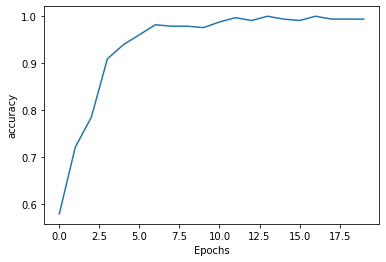

In [7]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
	plt.plot(history.history[string])
	plt.xlabel('Epochs')
	plt.ylabel(string)
	plt.show()
	
plot_graphs(history, 'accuracy')

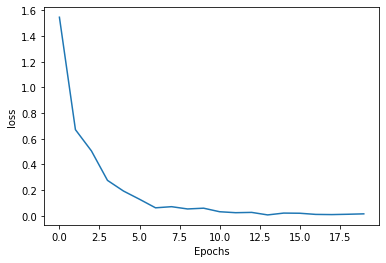

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
	plt.plot(history.history[string])
	plt.xlabel('Epochs')
	plt.ylabel(string)
	plt.show()
	
plot_graphs(history, 'loss')

## Saving the model

In [11]:
classifier_json = classifier.to_json()

with open("CNN_BanglaHandWrittenCharacterRecognition.json", "w") as json_file:
    json_file.write(classifier_json)
    
classifier.save_weights("CNN_BanglaHandWrittenCharacterRecognition.h5")
print('Saved model to disk')

Saved model to disk


## Creating a graphical user interface to draw the character

In [12]:
import PIL
from PIL import ImageTk, ImageDraw, Image

from keras.preprocessing import image
import os

In [13]:
from tkinter import *
def create_new_image():
    width = 256
    height = 256
    center = height // 2
    white = (255, 255, 255)
    green = (0, 128, 0)
    
    def save():
        filename = 'F:/Bangla-Handwritten-Character-Recognition-main/Dataset/SinglePrediction/image.jpg'
        image.save(filename)
        
    def paint(event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        cv.create_oval(x1, y1, x2, y2, fill = 'black', width = 30)
        draw.line([x1, y1, x2, y2], fill = 'black', width = 30)
        
    root = Tk() 
    
    cv = Canvas(root, width = width, height = height, bg = 'white')
    cv.pack()
    
    image = PIL.Image.new('RGB', (width, height), white)
    draw = ImageDraw.Draw(image)
    
    cv.pack(expand = YES, fill = BOTH)
    cv.bind("<B1-Motion>", paint)
    
    button = Button(text = 'Save', command = save)
    button.pack()
    
    root.mainloop()

In [14]:
training_set.class_indices

{'172': 0,
 '173': 1,
 '174': 2,
 '175': 3,
 '176': 4,
 '177': 5,
 '178': 6,
 '179': 7,
 '180': 8,
 '181': 9,
 '182': 10,
 '183': 11,
 '184': 12,
 '185': 13,
 '186': 14,
 '187': 15,
 '188': 16,
 '189': 17,
 '190': 18,
 '191': 19,
 '192': 20,
 '193': 21,
 '194': 22,
 '195': 23,
 '196': 24,
 '197': 25,
 '198': 26,
 '199': 27,
 '200': 28,
 '201': 29,
 '202': 30,
 '203': 31,
 '204': 32,
 '205': 33,
 '206': 34,
 '207': 35,
 '208': 36,
 '209': 37,
 '210': 38,
 '211': 39,
 '212': 40,
 '213': 41,
 '214': 42,
 '215': 43,
 '216': 44,
 '217': 45,
 '218': 46,
 '219': 47,
 '220': 48,
 '221': 49}

In [15]:
def determine_character(res):
    if res == 0:
        print('prediction : অ')
    elif res == 1:
        print('prediction : আ')
    elif res == 2:
        print('prediction : ই')
    elif res == 3:
        print('prediction : ঈ')
    elif res == 4:
        print('prediction : উ')
    elif res == 5:
        print('prediction : ঊ')
    elif res == 6:
        print('prediction : ঋ')
    elif res == 7:
        print('prediction : এ')
    elif res == 8:
        print('prediction : ঐ')
    elif res == 9:
        print('prediction : ও')
    elif res == 10:
        print('prediction : ঔ')
    elif res == 11:
        print('prediction : ক')
    elif res == 12:
        print('prediction : খ')
    elif res == 13:
        print('prediction : গ')
    elif res == 14:
        print('prediction : ঘ')
    elif res == 15:
        print('prediction : ঙ')
    elif res == 16:
        print('prediction : চ')
    elif res == 17:
        print('prediction : ছ')
    elif res == 18:
        print('prediction : জ')
    elif res == 19:
        print('prediction : ঝ')
    elif res == 20:
        print('prediction : ঞ')
    elif res == 21:
        print('prediction : ট')
    elif res == 22:
        print('prediction : ঠ')
    elif res == 23:
        print('prediction : ড')
    elif res == 24:
        print('prediction : ঢ')
    elif res == 25:
        print('prediction : ণ')
    elif res == 26:
        print('prediction : ত')
    elif res == 27:
        print('prediction : থ')
    elif res == 28:
        print('prediction : দ')
    elif res == 29:
        print('prediction : ধ')
    elif res == 30:
        print('prediction : ন')
    elif res == 31:
        print('prediction : প')
    elif res == 32:
        print('prediction : ফ')
    elif res == 33:
        print('prediction : ব')
    elif res == 34:
        print('prediction : ভ')
    elif res == 35:
        print('prediction : ম')
    elif res == 36:
        print('prediction : য')
    elif res == 37:
        print('prediction : র')
    elif res == 38:
        print('prediction : ল')
    elif res == 39:
        print('prediction : শ')
    elif res == 40:
        print('prediction : ষ')
    elif res == 41:
        print('prediction : স')
    elif res == 42:
        print('prediction : হ')
    elif res == 43:
        print('prediction : ড়')
    elif res == 44:
        print('prediction : ঢ়')
    elif res == 45:
        print('prediction : য়')
    elif res == 46:
        print('prediction : ৎ')
    elif res == 47:
        print('prediction : ং')
    elif res == 48:
        print('prediction : ঃ')
    else:
        print('prediction : ঁ')

In [16]:
import numpy as np

def single_prediction(test_img):
    test_img_arr = image.img_to_array(test_img)
    test_img_arr = np.expand_dims(test_img_arr, axis = 0)
    prediction = classifier.predict(test_img_arr)
    result = np.argmax(prediction, axis = 1)
    determine_character(result)

In [17]:
def delete_created_image():
    os.remove('F:\Bangla-Handwritten-Character-Recognition-main\Dataset\SinglePrediction\image.jpg')

In [18]:
import matplotlib.pyplot as plt

def draw_n_guess_the_character():
    create_new_image()
    test_img = image.load_img('F:\Bangla-Handwritten-Character-Recognition-main\Dataset\Test\173\image.jpg', target_size = (40, 40, 3))
    single_prediction(test_img)
    plt.imshow(test_img)
    delete_created_image()

In [19]:
draw_n_guess_the_character()

TclError: ignored